In [474]:
#!pip install plotly_express

In [478]:
%run algoritmo_evolutivo.ipynb

from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
import seaborn as sns

import plotly_express as px
import plotly.io as pio



#import plotly_express as px
#import plotly.io as pio
#pio.renderers.default = 'notebook'

## Reading the data

In [307]:
emissions_df = pd.read_csv("Fuel_Consumption_Ratings.csv", encoding='cp1252',
                 nrows=26082, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14], index_col=False)

emissions_df = emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb','CO2_Emissions','CO2_Rating','Smog_Rating']]

# take a look at the dataset
emissions_df.sample(4)

Engine_Size  Cylinders  Fuel_Consumption_City  Fuel_Consumption_Hwy  \
21775          2.3          4                   13.0                   8.3   
14085          1.8          4                    9.5                   6.8   
14651          2.5          5                   12.8                   8.9   
16408          4.6          8                   14.5                   9.7   

       Fuel_Consumption_Comb  CO2_Emissions  CO2_Rating  Smog_Rating  
21775                   10.9            251         NaN          NaN  
14085                    8.3            191         NaN          NaN  
14651                   11.0            253         NaN          NaN  
16408                   12.3            283         NaN          NaN

## Separate features and target in different datasets

In [308]:
X =  emissions_df[['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy']]
y =  emissions_df['CO2_Emissions']

X,X_test,y,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [234]:
np.shape(y)

(705,)

# Crear población

In [18]:
poblacion = Poblacion(
                n_individuos = 50,
                n_variables  = 5,
                limites_inf  = [-200,-200,-200,-200,-200],
                limites_sup  = [300,300,300,300,300],
                verbose = False
            )

In [19]:
#poblacion.mostrar_individuos(n=3)

# Evaluar población

In [20]:
def y_predict(a,b,c,d,e):
  return  a + b*X['Engine_Size'] + c*X['Cylinders'] + d*X['Fuel_Consumption_City'] +  e*X['Fuel_Consumption_Hwy'] 

def y_predict_test(a,b,c,d,e):
  return  a + b*X_test['Engine_Size'] + c*X_test['Cylinders'] + d*X_test['Fuel_Consumption_City'] +  e*X_test['Fuel_Consumption_Hwy'] 

In [21]:
# Seleccion aleatoria del punto de partida
p = np.random.rand(5) * 95 

y_pred = y_predict(p[0], p[1], p[2], p[3], p[4])
y_pred

590    1315.953172
81     2388.489970
650    1478.865966
361    1712.324215
549    1959.924161
          ...     
106    2172.484729
270    2208.155643
860    1618.401261
435    1488.864761
102    2395.688607
Length: 705, dtype: float64

In [22]:
def funcion_objetivo(a,b,c,d,e):
    f = sum(np.power( y - y_predict(a,b,c,d,e), 2)) * (1/len(y))
    return(f)

In [23]:
funcion_objetivo(p[0],p[1],p[2],p[3],p[4])

2792743.64243407

In [24]:
poblacion.optimizar(
    funcion_objetivo   = funcion_objetivo,
    optimizacion       = "minimizar",
    n_generaciones     = 500,
    metodo_seleccion   = "tournament",
    elitismo           = 0.2,
    prob_mut           = 0.1,
    distribucion       = "uniforme",
    media_distribucion = 1,
    sd_distribucion    = 1,
    min_distribucion   = -1,
    max_distribucion   = 1,
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-18,
    verbose            = False
)

-------------------------------------------
Optimización finalizada 2022-04-12 17:23:00
-------------------------------------------
Duración optimización: 26.398630684008822
Número de generaciones: 499
Valor óptimo de las variables: [281.2889865705353 91.31344784793097 -79.03302960918865 61.9647987977366
 -66.8149927028308]
Valor función objetivo: 6587.737006579405



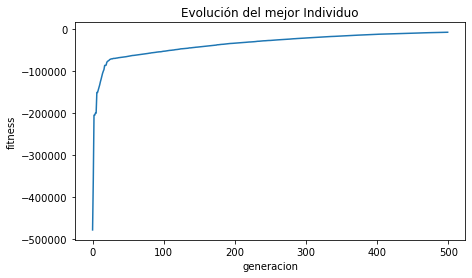

In [25]:
# Evolución de la optimización
fig, ax = plt.subplots(figsize=(7, 4))
poblacion.resultados_df.plot(x = "generacion",
                             y = "mejor_fitness",
                             ax= ax)
ax.set(title='Evolución del mejor Individuo', xlabel='generacion', ylabel='fitness')
ax.legend().set_visible(False)

****************************************************************
MSE: 81.16487544855478
R2-score: -0.58


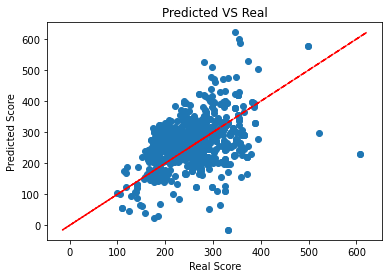

In [26]:
a,b,c,d,e = poblacion.valor_variables_optimo
prediction = y_predict(a,b,c,d,e)
print('*'*64)
print('MSE:', mse(y, prediction,squared=False))
print("R2-score: %.2f" % r2_score(y, prediction))
#print('intecep:',stimator.intercept_,' Coeficient:',stimator.coef_)

plt.ylabel('Predicted Score')
plt.xlabel('Real Score')
plt.title('Predicted VS Real')
plt.scatter(y, prediction)
plt.plot(prediction, prediction,'r--')
plt.show()

In [27]:
poblacion.valor_funcion_optimo

6587.737006579405

In [117]:
random.seed(123)

# Variando Individuos

In [ ]:
num_individuos = [20, 30, 40, 50, 60, 70, 80]
time = []
RMSE_train = []
RMSE_test = []
r2_train = []
r2_test = []
poblacion_inicial = []

for i in num_individuos:
    
    time_aux = []
    RMSE_train_aux = []
    RMSE_test_aux = []
    r2_train_aux = []
    r2_test_aux = []
    
    print('Processing with:', i, 'Individuos')
    
    for j in range(1,3):
        poblacion = Poblacion(
            n_individuos = i,
            n_variables  = 5,
            limites_inf  = [-200,-200,-200,-200,-200],
            limites_sup  = [300,300,300,300,300],
            verbose = False
            )
        
        random.seed(123)
        poblacion.optimizar(
            funcion_objetivo   = funcion_objetivo,
            optimizacion       = "minimizar",
            n_generaciones     = 400,
            metodo_seleccion   = "rank",
            elitismo           = 0.1,
            prob_mut           = 0.1,
            distribucion       = "uniforme",
            media_distribucion = 1,
            sd_distribucion    = 1,
            min_distribucion   = -1,
            max_distribucion   = 1,
            parada_temprana    = True,
            rondas_parada      = 10,
            tolerancia_parada  = 10**-20,
            verbose            = False)
        
        a,b,c,d,e = poblacion.valor_variables_optimo                
        prediction_train = y_predict(a,b,c,d,e)
        prediction_test = y_predict_test(a,b,c,d,e)
                
            
        time_aux.append(round(poblacion.duration,3))
        RMSE_train_aux.append(round( mse(y,prediction_train,squared=False) ))
        RMSE_test_aux.append(round(mse(y_test,prediction_test,squared=False)))
        r2_train_aux.append(round(r2_score(y, prediction_train),3))
        r2_test_aux.append(round(r2_score(y_test, prediction_test),3))
        
    poblacion_inicial.append(i)
    time.append(np.mean(time_aux))
    RMSE_train.append(np.mean(RMSE_train_aux))
    RMSE_test.append(np.mean(RMSE_test_aux))
    r2_train.append(np.mean(r2_train_aux))
    r2_test.append(np.mean(r2_test_aux))

Processing with: 20 Individuos
Algoritmo detenido en la generación 305 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: 30 Individuos
Algoritmo detenido en la generación 305 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: 40 Individuos


In [140]:
df = pd.DataFrame()
df['poblacion_inicial'] = poblacion_inicial
df['exec_time'] = time
df['RMSE_train'] = RMSE_train
df['RMSE_test'] = RMSE_test
df['r^2_train'] = r2_train
df['r^2_test'] = r2_test

print(df)

   poblacion_inicial  exec_time  RMSE_train  RMSE_test  r^2_train  r^2_test
0                 20     7.8070        34.0       33.0     0.6570    0.6715
1                 30    11.6680        16.5       15.5     0.9345    0.9450
2                 40    12.0275        15.5       14.5     0.9405    0.9490
3                 50    18.2025        19.0       18.0     0.9085    0.9190
4                 60    19.3335        15.0       14.5     0.9440    0.9505
5                 70    25.7555        22.0       21.5     0.8830    0.8930
6                 80    29.4165        20.5       20.0     0.8970    0.9045


In [141]:
df.to_csv('dataframes/poblacion.csv', index=False)
df_poblacion = pd.read_csv("dataframes/poblacion.csv", encoding='cp1252', index_col=False)
df_poblacion

poblacion_inicial  exec_time  RMSE_train  RMSE_test  r^2_train  r^2_test
0                 20     7.8070        34.0       33.0     0.6570    0.6715
1                 30    11.6680        16.5       15.5     0.9345    0.9450
2                 40    12.0275        15.5       14.5     0.9405    0.9490
3                 50    18.2025        19.0       18.0     0.9085    0.9190
4                 60    19.3335        15.0       14.5     0.9440    0.9505
5                 70    25.7555        22.0       21.5     0.8830    0.8930
6                 80    29.4165        20.5       20.0     0.8970    0.9045

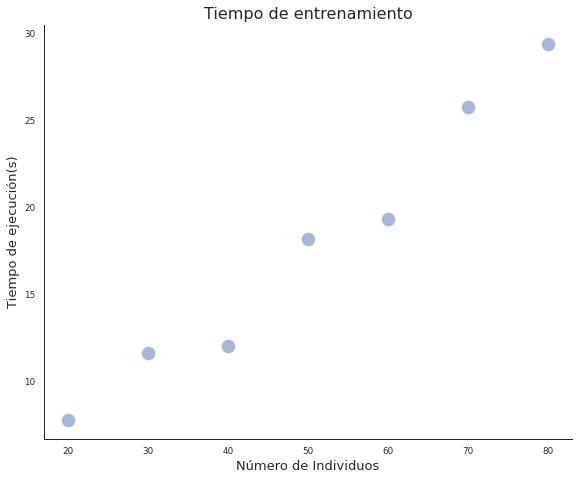

In [142]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="poblacion_inicial", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=df_poblacion) \
    .set(title='Tiempo de entrenamiento', xlabel='Número de Individuos', ylabel='Tiempo de ejecución(s)',
        )
plt.gcf().set_size_inches(9, 7)

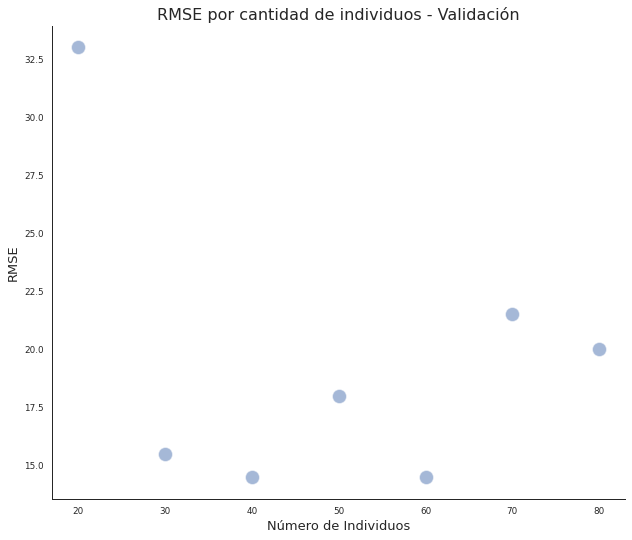

In [143]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="poblacion_inicial", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_poblacion) \
    .set(title='RMSE por cantidad de individuos - Validación', xlabel='Número de Individuos', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

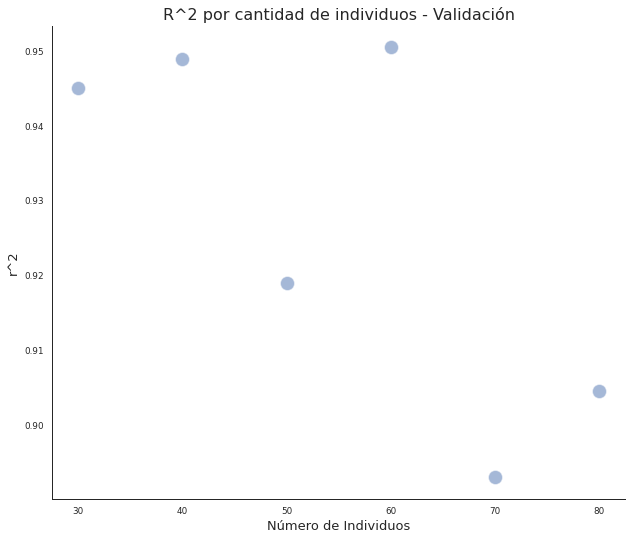

In [144]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="poblacion_inicial", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_poblacion.iloc[1:]) \
    .set(title='R^2 por cantidad de individuos - Validación', xlabel='Número de Individuos', ylabel='r^2')
plt.gcf().set_size_inches(10, 8)

# Variando Metodo de selección

In [70]:
metodo = ["ruleta", "rank", "tournament"]

time = []
RMSE_train = []
RMSE_test = []
r2_train = []
r2_test = []
metodo_seleccion = []

for i in metodo:
    
    time_aux = []
    RMSE_train_aux = []
    RMSE_test_aux = []
    r2_train_aux = []
    r2_test_aux = []
    
    print('Processing with:', i, 'Individuos')
    
    for j in range(1,6):
        
        poblacion = Poblacion(
            n_individuos = 100,
            n_variables  = 5,
            #limites_inf  = [0,-10,-10,-10,-10],
            #limites_sup  = [100,-50,50,50,50],
            verbose = False
            )
        
        poblacion.optimizar(
            funcion_objetivo   = funcion_objetivo,
            optimizacion       = "minimizar",
            n_generaciones     = 1200,
            metodo_seleccion   = i,
            elitismo           = 0.2,
            prob_mut           = 0.1,
            distribucion       = "uniforme",
            media_distribucion = 1,
            sd_distribucion    = 1,
            min_distribucion   = -1,
            max_distribucion   = 1,
            parada_temprana    = True,
            rondas_parada      = 10,
            tolerancia_parada  = 10**-20,
            verbose            = False)
        
        a,b,c,d,e = poblacion.valor_variables_optimo                
        prediction_train = y_predict(a,b,c,d,e)
        prediction_test = y_predict_test(a,b,c,d,e)
                
            
        time_aux.append(round(poblacion.duration,3))
        RMSE_train_aux.append(round( mse(y,prediction_train,squared=False) ))
        RMSE_test_aux.append(round(mse(y_test,prediction_test,squared=False)))
        r2_train_aux.append(round(r2_score(y, prediction_train),3))
        r2_test_aux.append(round(r2_score(y_test, prediction_test),3))
        
    metodo_seleccion.append(i)
    time.append(np.mean(time_aux))
    RMSE_train.append(np.mean(RMSE_train_aux))
    RMSE_test.append(np.mean(RMSE_test_aux))
    r2_train.append(np.mean(r2_train_aux))
    r2_test.append(np.mean(r2_test_aux))

Processing with: ruleta Individuos
Algoritmo detenido en la generación 11 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 11 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 11 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 11 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 11 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: rank Individuos
Algoritmo detenido en la generación 767 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 1133 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 757 por falta cambio absoluto mínimo de 1e-20 durante 10 gen

In [71]:
df = pd.DataFrame()
df['metodo_seleccion'] = metodo_seleccion
df['exec_time'] = time
df['RMSE_train'] = RMSE_train
df['RMSE_test'] = RMSE_test
df['r^2_train'] = r2_train
df['r^2_test'] = r2_test

print(df)

  metodo_seleccion  exec_time  RMSE_train  RMSE_test  r^2_train  r^2_test
0           ruleta     1.2132       610.6      595.4   -93.8120  -86.5476
1             rank    94.8370        15.2       14.8     0.9432    0.9500
2       tournament   112.0012        19.0       17.8     0.8990    0.9146


In [72]:
df.to_csv('dataframes/metodo_seleccion.csv', index=False)
df_mtd_seleccion = pd.read_csv("dataframes/metodo_seleccion.csv", encoding='cp1252', index_col=False)
df_mtd_seleccion

metodo_seleccion  exec_time  RMSE_train  RMSE_test  r^2_train  r^2_test
0           ruleta     1.2132       610.6      595.4   -93.8120  -86.5476
1             rank    94.8370        15.2       14.8     0.9432    0.9500
2       tournament   112.0012        19.0       17.8     0.8990    0.9146

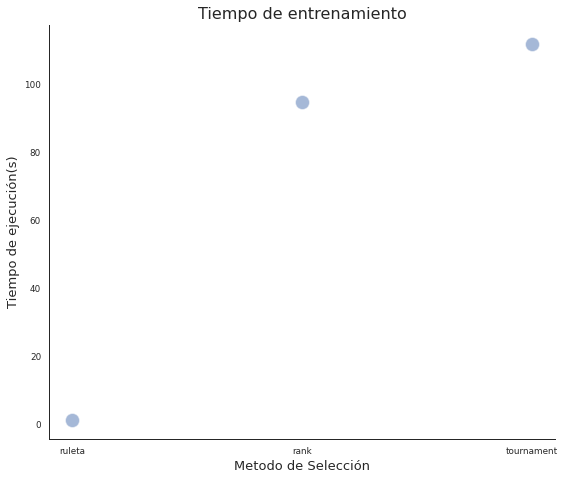

In [81]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="metodo_seleccion", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=df_mtd_seleccion) \
    .set(title='Tiempo de entrenamiento', xlabel='Metodo de Selección', ylabel='Tiempo de ejecución(s)',
        )
plt.gcf().set_size_inches(9, 7)

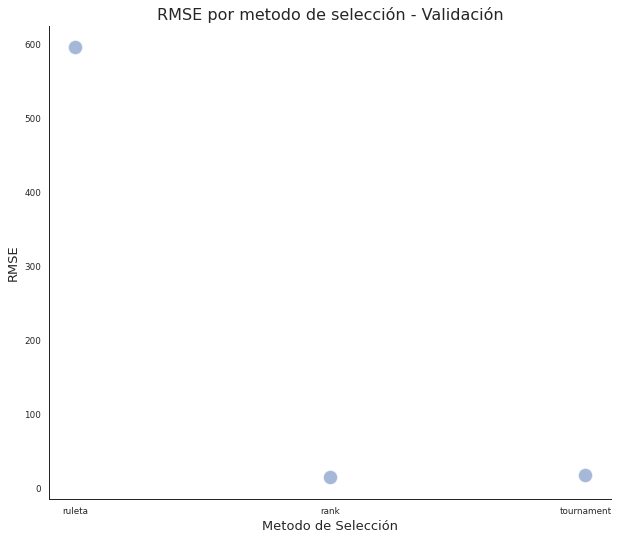

In [80]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="metodo_seleccion", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_mtd_seleccion) \
    .set(title='RMSE por metodo de selección - Validación', xlabel='Metodo de Selección', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

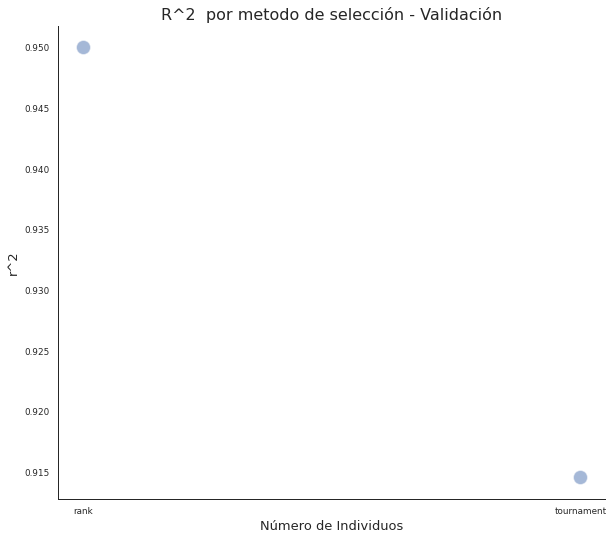

In [79]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="metodo_seleccion", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_mtd_seleccion.iloc[1:]) \
    .set(title='R^2  por metodo de selección - Validación', xlabel='Metodo de Selección', ylabel='r^2')
plt.gcf().set_size_inches(10, 8)

# Mutación

In [94]:
mutaciones = [0.2, 0.1, 0.05, 0.025, 0.01]

time = []
RMSE_train = []
RMSE_test = []
r2_train = []
r2_test = []
prob_mutacion = []

for i in mutaciones:
    
    time_aux = []
    RMSE_train_aux = []
    RMSE_test_aux = []
    r2_train_aux = []
    r2_test_aux = []
    
    print('Processing with:', i, 'Individuos')
    
    for j in range(1,4):
        
        poblacion = Poblacion(
            n_individuos = 100,
            n_variables  = 5,
            #limites_inf  = [0,-10,-10,-10,-10],
            #limites_sup  = [100,-50,50,50,50],
            verbose = False
            )
        
        poblacion.optimizar(
            funcion_objetivo   = funcion_objetivo,
            optimizacion       = "minimizar",
            n_generaciones     = 1000,
            metodo_seleccion   = 'rank',
            elitismo           = 0.2,
            prob_mut           = i,
            distribucion       = "uniforme",
            media_distribucion = 1,
            sd_distribucion    = 1,
            min_distribucion   = -1,
            max_distribucion   = 1,
            parada_temprana    = True,
            rondas_parada      = 10,
            tolerancia_parada  = 10**-20,
            verbose            = False)
        
        a,b,c,d,e = poblacion.valor_variables_optimo                
        prediction_train = y_predict(a,b,c,d,e)
        prediction_test = y_predict_test(a,b,c,d,e)
                
            
        time_aux.append(round(poblacion.duration,3))
        RMSE_train_aux.append(round( mse(y,prediction_train,squared=False) ))
        RMSE_test_aux.append(round(mse(y_test,prediction_test,squared=False)))
        r2_train_aux.append(round(r2_score(y, prediction_train),3))
        r2_test_aux.append(round(r2_score(y_test, prediction_test),3))
        
    prob_mutacion.append(i)
    time.append(np.mean(time_aux))
    RMSE_train.append(np.mean(RMSE_train_aux))
    RMSE_test.append(np.mean(RMSE_test_aux))
    r2_train.append(np.mean(r2_train_aux))
    r2_test.append(np.mean(r2_test_aux))

Processing with: 0.2 Individuos
Algoritmo detenido en la generación 967 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 805 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 1123 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: 0.1 Individuos
Algoritmo detenido en la generación 1127 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 1185 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: 0.05 Individuos
Algoritmo detenido en la generación 805 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Algoritmo detenido en la generación 967 por falta cambio absoluto mínimo de 1e-20 durante 10 generaciones consecutivas.
Processing with: 0.025 Individuos
Algoritmo detenido en la g

In [95]:
df = pd.DataFrame()
df['Probabilidad de mutacion'] = prob_mutacion
df['exec_time'] = time
df['RMSE_train'] = RMSE_train
df['RMSE_test'] = RMSE_test
df['r^2_train'] = r2_train
df['r^2_test'] = r2_test


In [96]:
df.to_csv('dataframes/mutacion.csv', index=False)
df_mutacion = pd.read_csv("dataframes/mutacion.csv", encoding='cp1252', index_col=False)
df_mutacion

Probabilidad de mutacion   exec_time  RMSE_train  RMSE_test  r^2_train  \
0                     0.200   96.677333        15.0  14.666667      0.944   
1                     0.100  121.506667        23.0  21.333333      0.839   
2                     0.050  106.191333        16.0  15.000000      0.938   
3                     0.025  102.571333        15.0  14.333333      0.944   
4                     0.010  121.629333        16.0  15.333333      0.937   

   r^2_test  
0  0.951000  
1  0.871333  
2  0.947000  
3  0.950333  
4  0.944333

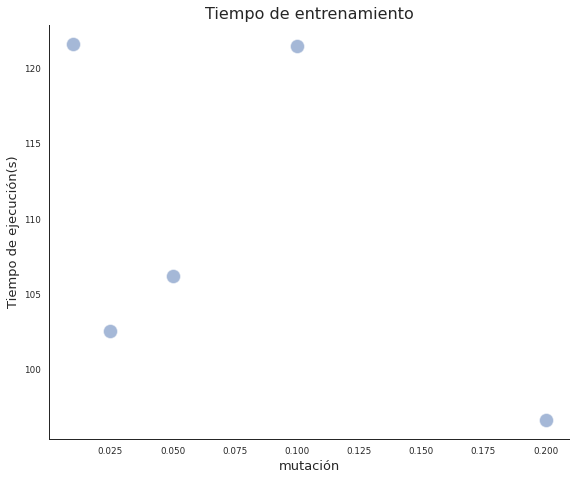

In [97]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="Probabilidad de mutacion", y="exec_time", alpha=.5, palette="muted", s=200,
            height=6, data=df_mutacion) \
    .set(title='Tiempo de entrenamiento', xlabel='mutación', ylabel='Tiempo de ejecución(s)',
        )
plt.gcf().set_size_inches(9, 7)

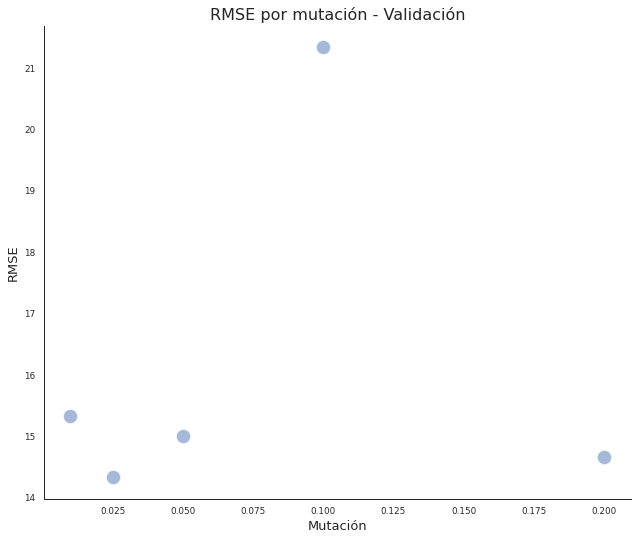

In [98]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="Probabilidad de mutacion", y="RMSE_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_mutacion) \
    .set(title='RMSE por mutación - Validación', xlabel='Mutación', ylabel='RMSE')
plt.gcf().set_size_inches(10, 8)

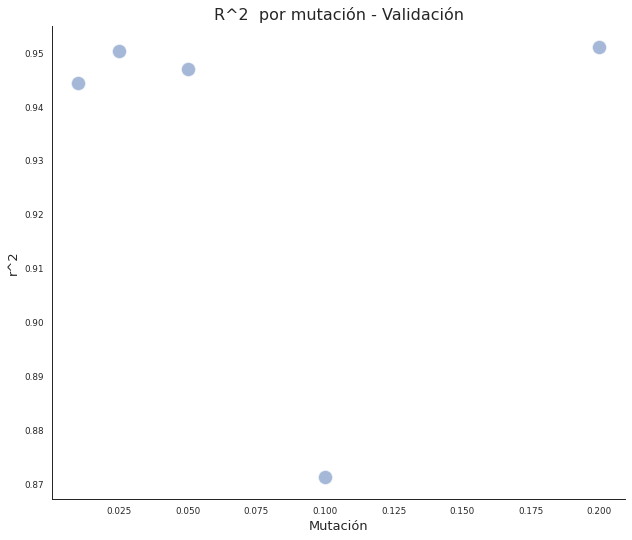

In [99]:
sns.set_theme(style="white")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":16,"axes.labelsize":13})   


sns.relplot(x="Probabilidad de mutacion", y="r^2_test", alpha=.5, palette="muted", s=200,
            height=6, data=df_mutacion) \
    .set(title='R^2  por mutación - Validación', xlabel='Mutación', ylabel='r^2')
plt.gcf().set_size_inches(10, 8)

# Another Analysis

### Valor óptimo de las variables: [281.289 91.313 -79.033 61.965 -66.815]

### Curvas de optimización 
Parametros (b,c) de:  
f(X) = a + b*X['Engine_Size'] + c*X['Cylinders'] + d*X['Fuel_Consumption_City'] +  e*X['Fuel_Consumption_Hwy']

In [455]:
z_1 = []
# Grid de datos
x_ = np.arange(300, 1500, 15)
y_ = np.arange(-900, 0, 15)
x_, y_ = np.meshgrid(x_, y_)
for xi, yi in zip(np.ravel(x_), np.ravel(y_)):
    z_1.append(funcion_objetivo(a=281.2889,b=xi,c=yi,d=61.9648,e=-66.81499))

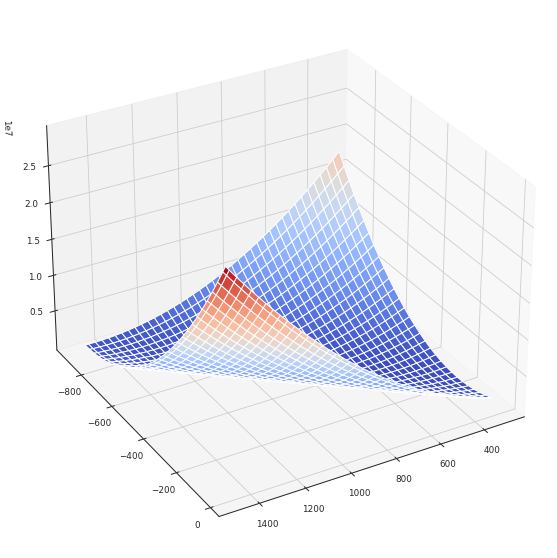

In [456]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

z = np.array(z_1)
z = z.reshape(x_.shape)
grafico = ax.plot_surface(x_, y_, z, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)
ax.view_init(30, 60)

### Curvas de optimización 
Parametros (d,e) de:  
f(X) = a + b*X['Engine_Size'] + c*X['Cylinders'] + d*X['Fuel_Consumption_City'] +  e*X['Fuel_Consumption_Hwy']

In [ ]:
z_2 = []
# Grid de datos
x_ = np.arange(-500, 600, 15)
y_ = np.arange(-700, 500, 15)
x_, y_ = np.meshgrid(x_, y_)
for xi, yi in zip(np.ravel(x_), np.ravel(y_)):
    z_2.append(funcion_objetivo(a=281.2889,b=91.3134,c=-79.033,d=xi,e=yi))

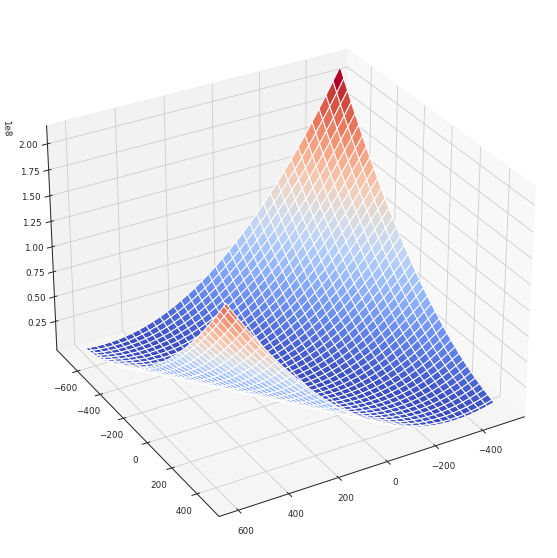

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

z = np.array(z_2)
z = z.reshape(x_.shape)
grafico = ax.plot_surface(x_, y_, z, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)
ax.view_init(30, 60)

### Contorno parametros [b,c]

In [465]:
z_4 = []
x_0 = np.linspace(start = 0, stop = 4000, num = 100)
x_1 = np.linspace(start = -1800, stop = -200, num = 100)
x_0, x_1 = np.meshgrid(x_0, x_1)
for xi, yi in zip(np.ravel(x_0), np.ravel(x_1)):
    z_4.append(funcion_objetivo_acot(a=281.2889,b=xi,c=yi,d=61.9648,e=-66.81499))
z_4 = np.array(z_4)
z_4 = z_4.reshape(x_0.shape)

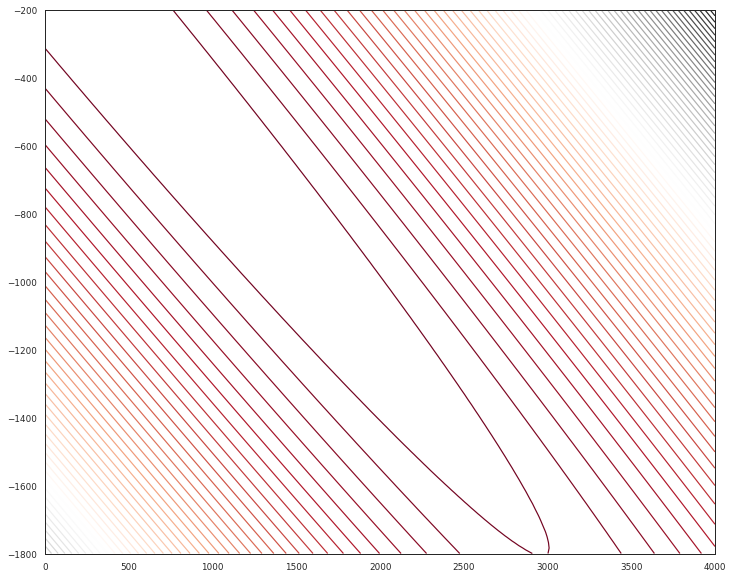

In [467]:
fig = plt.figure(figsize=(12, 10))
plt.contour(x_0, x_1, z_4, 70, cmap='RdGy')

### Contorno parametros [d,e]

In [461]:
z_3 = []
x_0 = np.linspace(start = -500, stop = 600, num = 100)
x_1 = np.linspace(start = -700, stop = 500, num = 100)
x_0, x_1 = np.meshgrid(x_0, x_1)
for xi, yi in zip(np.ravel(x_0), np.ravel(x_1)):
    z_3.append(funcion_objetivo(a=281.2889,b=91.3134,c=-79.033,d=xi,e=yi))
z_3 = np.array(z_3)
z_3 = z_3.reshape(x_0.shape)

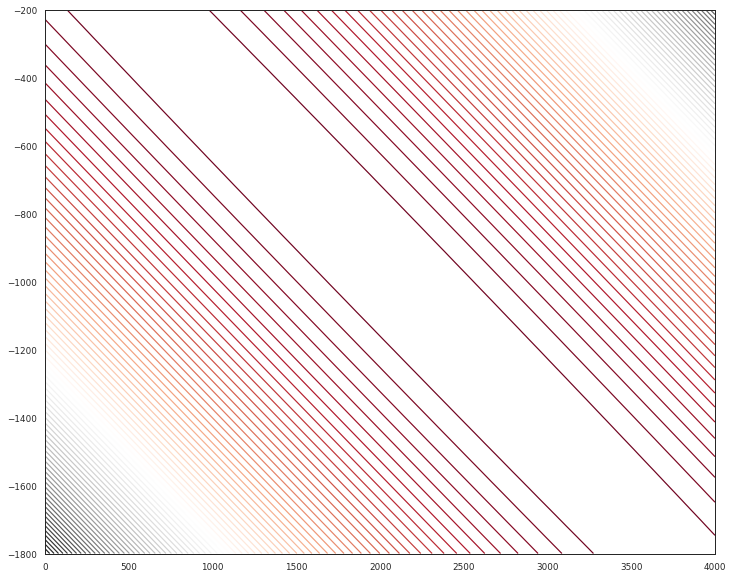

In [468]:
fig = plt.figure(figsize=(12, 10))
plt.contour(x_0, x_1, z_3, 70, cmap='RdGy')

In [470]:
def extraer_posicion(individuo):
    posicion = individuo.valor_variables
    return(posicion)

lista_df_temp = []

for i in np.arange(len(poblacion.historico_individuos)):
    posiciones = list(map(extraer_posicion, poblacion.historico_individuos[i]))
    df_temp = pd.DataFrame({"generacion": i, "posicion": posiciones})
    lista_df_temp.append(df_temp)

df_posiciones = pd.concat(lista_df_temp)

df_posiciones[['x_0','x_1','x_2','x_2','x_4']] = pd.DataFrame(df_posiciones["posicion"].values.tolist(),
                                            index= df_posiciones.index)

df_posiciones.head()

generacion                                           posicion         x_0  \
0           0  [-173.81820057452785, -156.40666123868385, 3.6... -173.818201   
1           0  [-180.9231669488388, 68.10102001696345, -33.90... -180.923167   
2           0  [-31.39167144536225, -33.10180268552236, -77.4...  -31.391671   
3           0  [-156.19325012478856, 98.79973224399527, -165.... -156.193250   
4           0  [252.69932614224945, -153.61771931075245, -128...  252.699326   

          x_1         x_2         x_4  
0 -156.406661 -146.149883  250.599439  
1   68.101020  226.043309 -120.168802  
2  -33.101803 -199.164723   18.137897  
3   98.799732  -42.270513   24.160854  
4 -153.617719  195.035922 -189.382013

In [479]:
pio.renderers.default = 'notebook'

px.scatter(
    df_posiciones,
    x       = "x_0",
    y       = "x_1",
    labels  = {"x_0": "", "x_1": ""},
    range_x = [-10, 0],
    range_y = [-6.5, 0],
    animation_frame = "generacion",
    width   = 700,
    height  = 450
)